In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv("../pl_stats.csv").sort_values(by='Rk', axis=0)

In [3]:
squad_names=data['Squad']

In [4]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [5]:
data_pressing = data.loc[:,def_pressing_stats]

In [6]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [7]:
possession_stats = ['Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [8]:
data_possession = data.loc[:,possession_stats]

In [9]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
        'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries',
        'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec',
        'PrgR'],
       dtype='object'))

In [10]:
data_pressing_possession = data_pressing.merge(data_possession).set_index(squad_names)

In [11]:
data_pressing_possession.index

Index(['Manchester City', 'Arsenal', 'Manchester Utd', 'Newcastle Utd',
       'Liverpool', 'Brighton', 'Aston Villa', 'Tottenham', 'Brentford',
       'Fulham', 'Crystal Palace', 'Chelsea', 'Wolves', 'West Ham',
       'Bournemouth', 'Nott'ham Forest', 'Everton', 'Leicester City',
       'Leeds United', 'Southampton'],
      dtype='object', name='Squad')

In [12]:
data_pressing_possession_corr = data_pressing_possession.corr()

<AxesSubplot:>

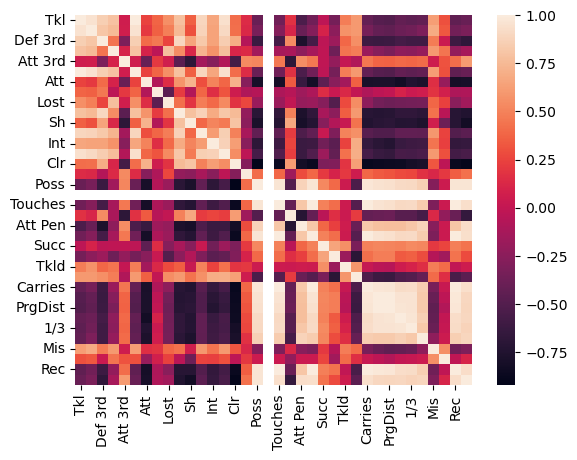

In [13]:
sns.heatmap(data_pressing_possession_corr)

In [14]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

In [15]:
correlated_features = data_pressing_possession_corr.loc[def_pressing_stats,possession_stats]

<AxesSubplot:>

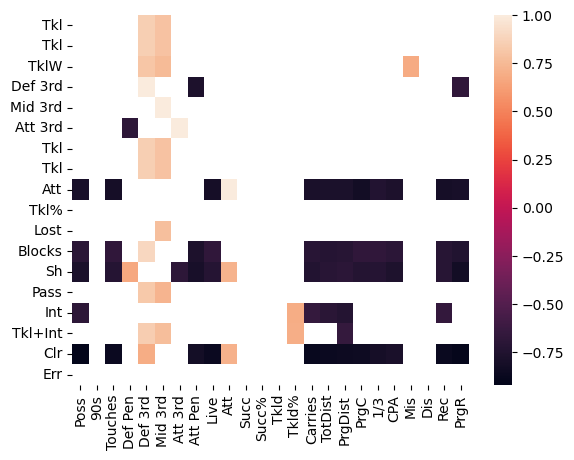

In [16]:
sns.heatmap(correlated_features)

In [17]:
correlated_features_df = correlated_features.stack().index
correlated_features_df=pd.DataFrame(correlated_features_df)

correlated_features_df

,0
0,"(Tkl, Def 3rd)"
1,"(Tkl, Mid 3rd)"
2,"(Tkl, Def 3rd)"
3,"(Tkl, Mid 3rd)"
4,"(TklW, Def 3rd)"
...,...
79,"(Clr, PrgC)"
80,"(Clr, 1/3)"
81,"(Clr, CPA)"
82,"(Clr, Rec)"


Plot function

In [24]:
def plot_data(df, y_cols):
    for i in y_cols:
        plt.figure()
        plt.xticks(rotation=90)
        plt.bar(df.index,df[i],label=i)
        plt.legend()
        plt.plot()

In [18]:
poss_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Poss'].dropna().index

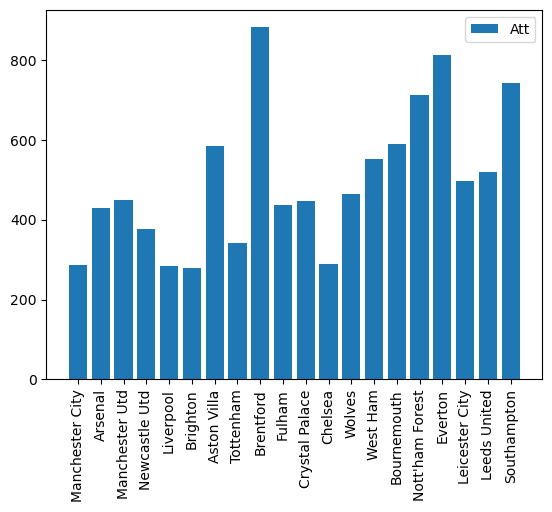

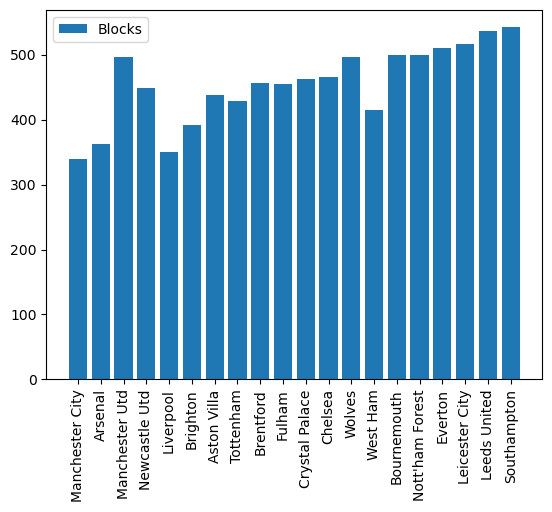

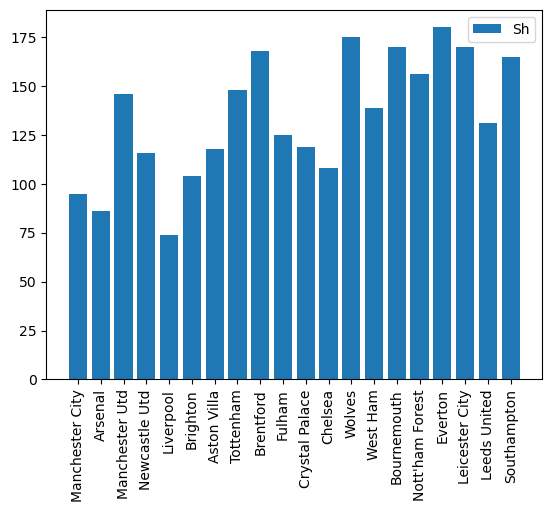

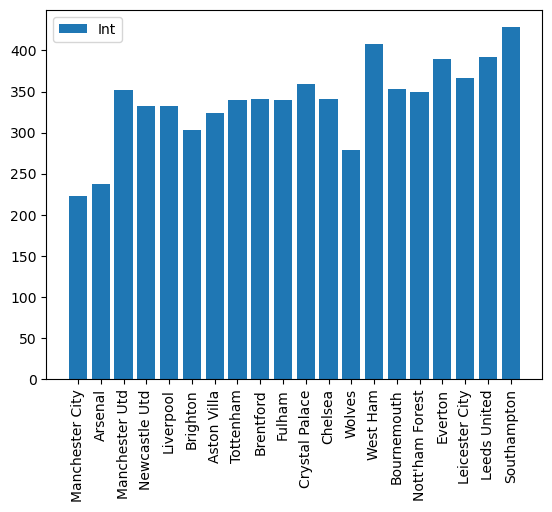

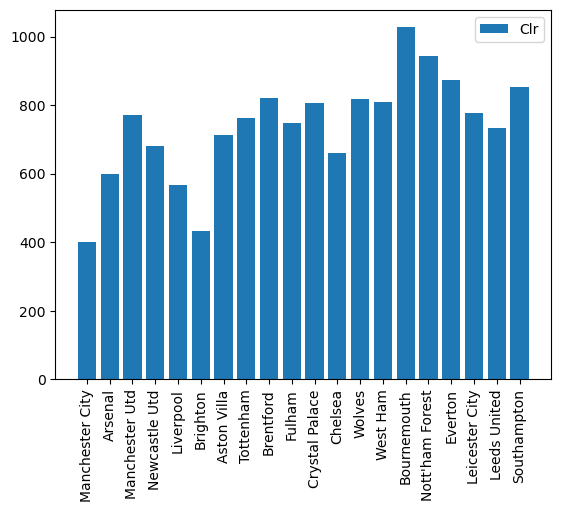

In [25]:
plot_data(data_pressing_possession, poss_press_stats)

In [22]:
dispossessed_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'Dis'].dropna().index

In [26]:
plot_data(data_pressing_possession, dispossessed_press_stats)

In [27]:
prog_carry_dist_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'PrgDist'].dropna().index

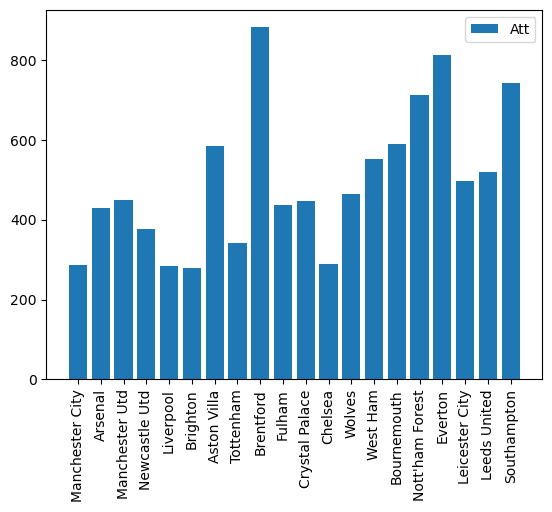

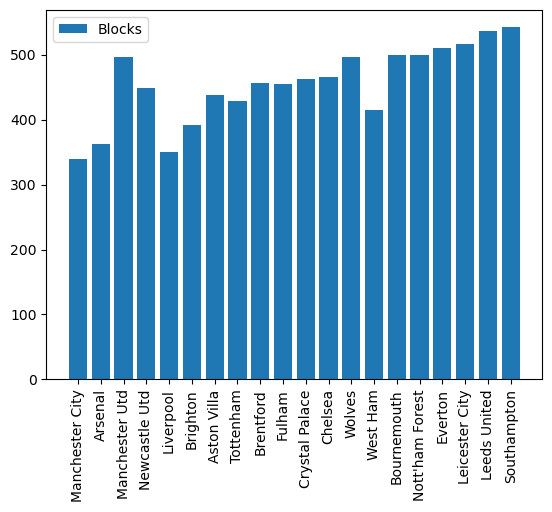

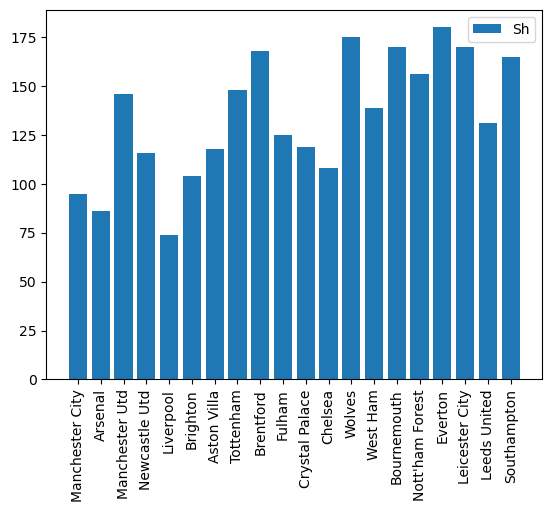

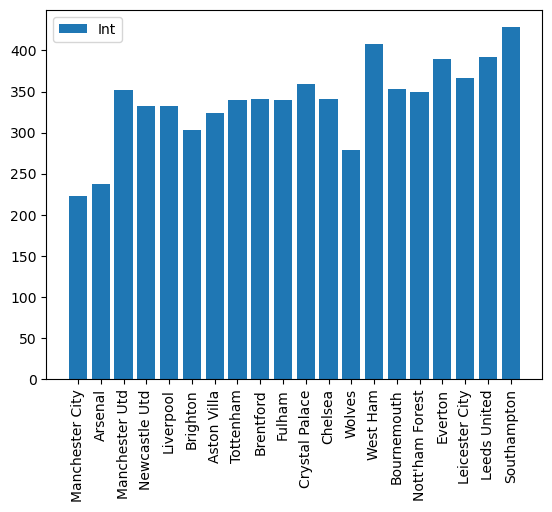

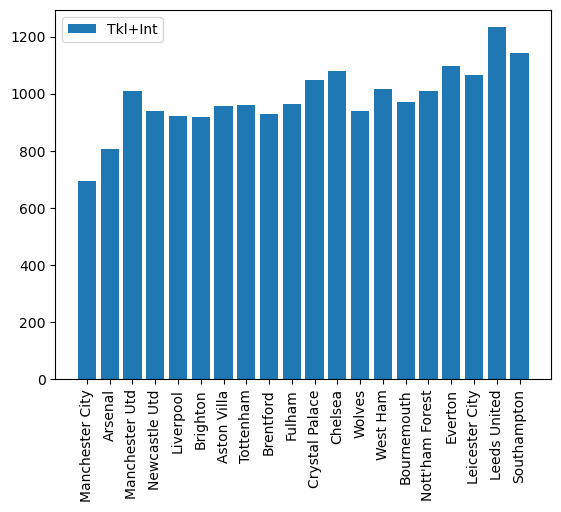

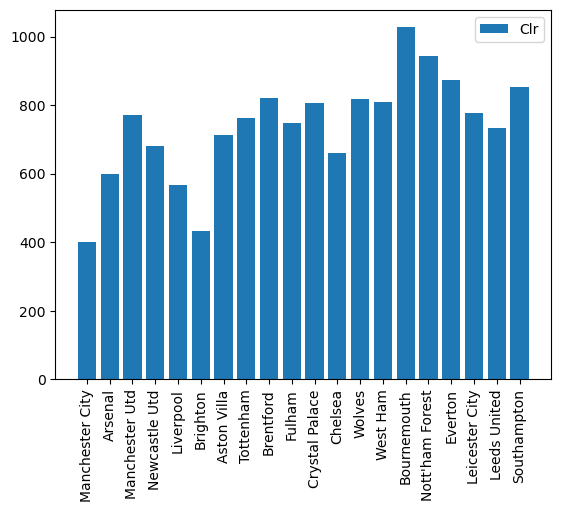

In [28]:
plot_data(data_pressing_possession, prog_carry_dist_press_stats)

In [29]:
prog_pass_rec_press_stats=data_pressing_possession_corr.loc[['Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err'],'PrgR'].dropna().index

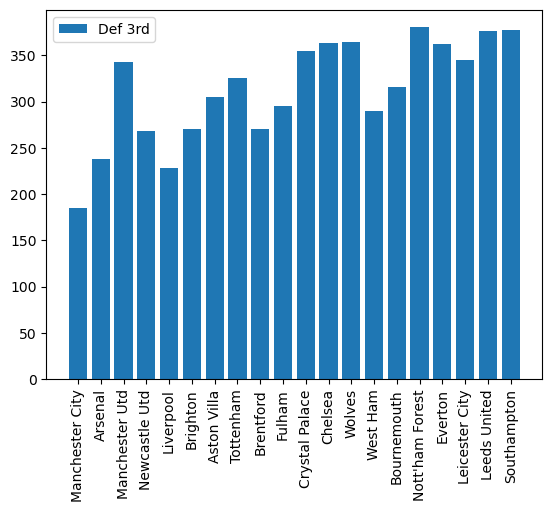

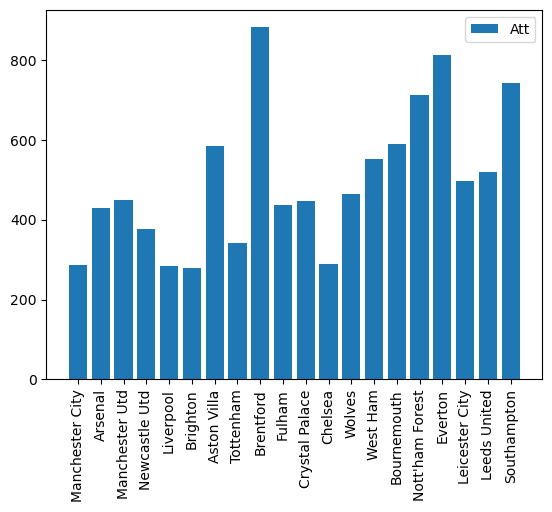

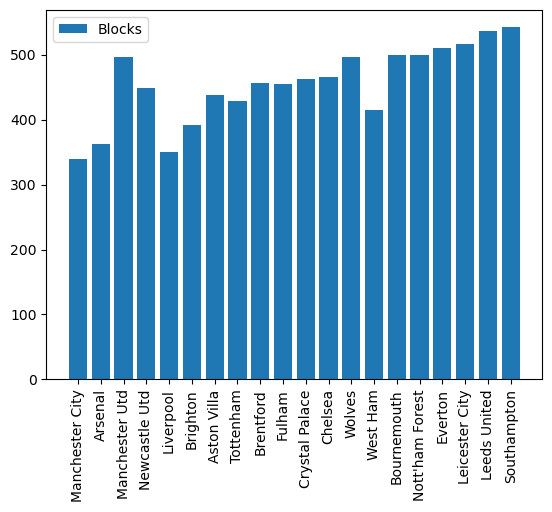

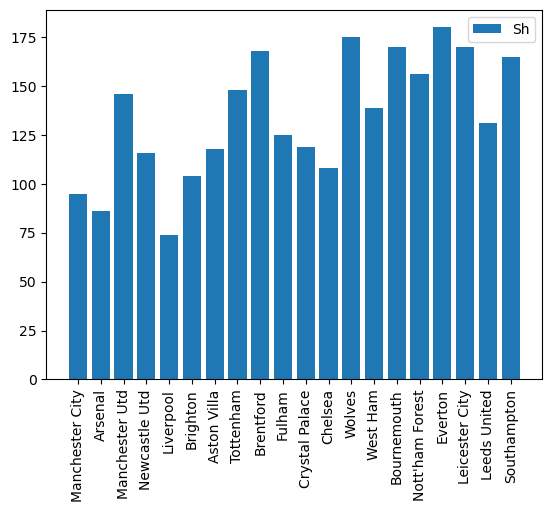

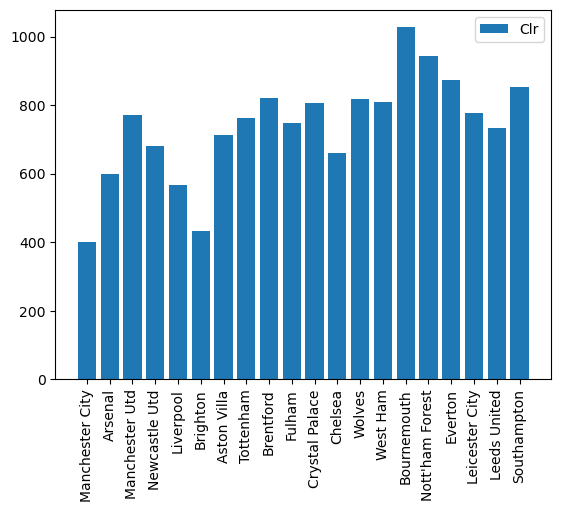

In [30]:
plot_data(data_pressing_possession, prog_pass_rec_press_stats)